In [15]:
library(dplyr)
#library(gplot2)
library(VennDiagram)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: grid
Loading required package: futile.logger


In [90]:
setwd("D:/common/project/yangyangli")

In [91]:
med <- read.csv("D:/Common/project/yangyangli/Med23_conserve_Id.csv", header=T)

In [92]:
pparg <- read.csv("gene_different_Pparg_KO_WT.csv", header=T)

In [93]:
med <- med[,c(8,9)]
pparg <- pparg[,c(7,9)]

In [94]:
dim(med)
dim(pparg)

[1] 12529     2

[1] 25194     2

In [95]:
pparg[pparg == ''] <- NA
med[med == ''] <- NA

In [96]:
med <-na.omit(med)
pparg <- na.omit(pparg)

In [97]:
dim(med)
dim(pparg)

[1] 12503     2

[1] 23269     2

In [98]:
med_d <-  unique(med$Name[med$change == "DOWN"])
pparg_d <- unique(pparg$Gene.symbol[pparg$change == "DOWN"])

In [99]:
length(med_d)
length(pparg_d)

[1] 248

[1] 137

In [100]:
color_v <- c("dodgerblue3", "firebrick2")
#color_v <- c("dodgerblue", "goldenrod1", "darkorange1", "seagreen3", "orchid3")

In [101]:
pdf(file="veen_down.pdf", width=5.5, height=5.5)
p=venn.diagram( x = list(A = med_d, B = pparg_d), filename= NULL, fill=color_v[1:2])
grid.draw(p)
dev.off()

png 
  2

In [102]:
down <- as.matrix(intersect(med_d, pparg_d))

In [103]:
med_u <- unique(med$Name[med$change == "UP"])
pparg_u <- unique(pparg$Gene.symbol[pparg$change == "UP"])

In [104]:
length(med_u)
length(pparg_u)

[1] 197

[1] 140

In [105]:
up <- as.matrix(intersect(med_u, pparg_u))

In [106]:
pdf(file="veen_up.pdf", width=5.5, height=5.5)
p=venn.diagram( x = list(A = med_u, B = pparg_u), filename= NULL, fill=color_v[1:2])
grid.draw(p)
dev.off()

png 
  2

In [108]:
med <- union(med_d, med_u)
length(med)

[1] 445

In [110]:
pparg <- union(pparg_d, pparg_u)
length(pparg)

[1] 277

In [111]:
intersect(pparg_d, pparg_u)

character(0)

In [113]:
pdf(file="veen_total.pdf", width=5.5, height=5.5)
p=venn.diagram( x = list(A = med, B = pparg), filename= NULL, fill=color_v[1:2])
grid.draw(p)
dev.off()

png 
  2

In [105]:
setwd("D:/Common/project/yangyangli")

In [114]:
write.csv(down, "down_med23_pparg.csv", quote=F, row.names=F)

In [115]:
write.csv(up, "up_med23_pparg.csv", quote=F, row.names=F)

In [116]:
total <- intersect(med, pparg)

In [118]:
length(total)

[1] 54

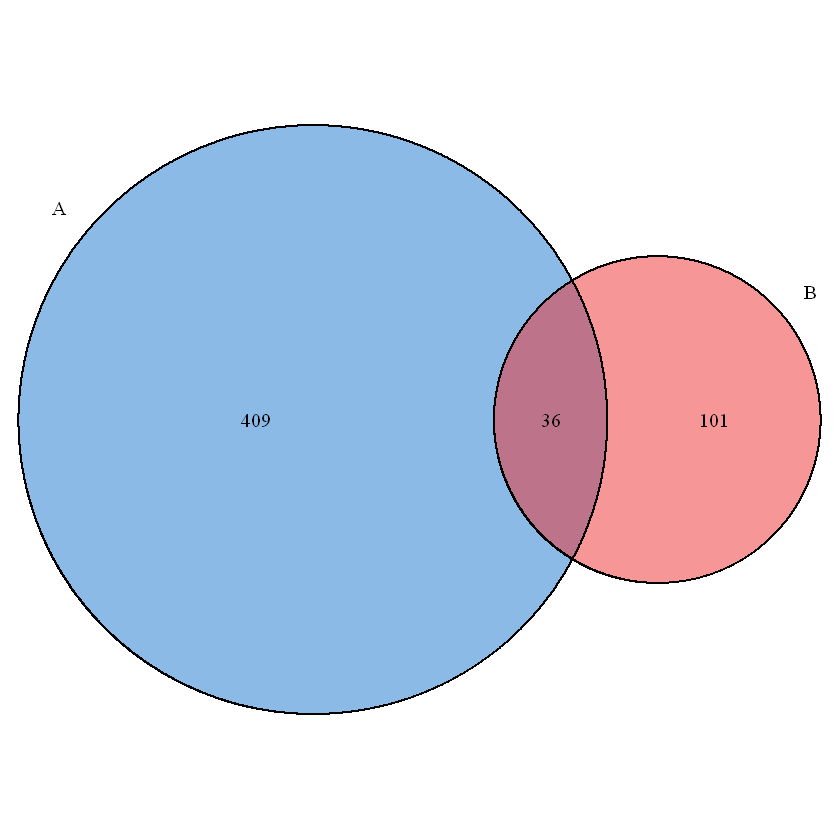

In [87]:
p=venn.diagram( x = list(A = med, B = pparg_d), filename= NULL, fill=color_v[1:2])
grid.draw(p)`x